In [146]:
import pandas as pd
import re
pd.set_option("display.max_colwidth", 100)

In [2]:
df_chart = pd.read_csv("CHARTEVENTS.csv", nrows=1000)

In [3]:
df_chart

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,15.00,15.00,L/min,0,0,NaN,NaN
1,789,36,165660,241249,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,100.00,100.00,NaN,0,0,NaN,NaN
2,790,36,165660,241249,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823,0.37,0.37,NaN,0,0,NaN,NaN
3,791,36,165660,241249,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,6.00,6.00,min,0,0,NaN,NaN
4,792,36,165660,241249,224330,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,2.50,2.50,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,863,36,165660,241249,224687,2134-05-12 16:00:00,2134-05-12 16:28:00,18428,11.00,11.00,L/min,0,0,NaN,NaN
996,864,36,165660,241249,224688,2134-05-12 16:00:00,2134-05-12 16:28:00,18428,20.00,20.00,insp/min,0,0,NaN,NaN
997,865,36,165660,241249,224689,2134-05-12 16:00:00,2134-05-12 16:28:00,18428,0.00,0.00,insp/min,0,0,NaN,NaN
998,866,36,165660,241249,224690,2134-05-12 16:00:00,2134-05-12 16:28:00,18428,20.00,20.00,insp/min,0,0,NaN,NaN


In [13]:
df_notes = pd.read_csv("NOTEEVENTS.csv")

/tmp/ipykernel_156546/1804918254.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_notes = pd.read_csv("NOTEEVENTS.csv")


In [22]:
print(df_notes["TEXT"][1:4])

1    Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]\n\nDate of Birth:                    Sex:  F\n\nService:  MICU and then to [**Doctor Last Name **] Medicine\n\nHISTORY OF PRESENT ILLNESS:  This is an 81-year-old female\nwith a history of emphysema (not on home O2), who presents\nwith three days of shortness of breath thought by her primary\ncare doctor to be a COPD flare.  Two days prior to admission,\nshe was started on a prednisone taper and one day prior to\nadmission she required oxygen at home in order to maintain\noxygen saturation greater than 90%.  She has also been on\nlevofloxacin and nebulizers, and was not getting better, and\npresented to the [**Hospital1 18**] Emergency Room.\n\nIn the [**Hospital3 **] Emergency Room, her oxygen saturation was\n100% on CPAP.  She was not able to be weaned off of this\ndespite nebulizer treatment and Solu-Medrol 125 mg IV x2.\n\nReview of systems is negative for the following:  Fevers,\nchills, nausea, vomiting, 

In [16]:
len(df_notes)

2083180

In [14]:
df_notes["SUBJECT_ID"].nunique()

46146

In [24]:
df_dis = df_notes[df_notes["CATEGORY"] == "Discharge summary"]

In [48]:
phrases = ["discharge diagnosis", "discharge diagnoses", "diagnosis on discharge", "diagnoses on discharge"]
pattern = "|".join(phrases)
result = df_dis[df_dis['TEXT'].str.contains(pattern, case=False, regex=True)]

In [49]:
print(len(result))

50277


In [50]:
result.to_csv("NoteEventsFiltered.csv")

In [51]:
len(result)

50277

In [150]:
df_fil = pd.read_csv("NoteEventsFiltered.csv", index_col=0)

In [151]:
print(df_fil["TEXT"].iloc[0])

Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]


Service: CARDIOTHORACIC

Allergies:
Amlodipine

Attending:[**Last Name (NamePattern1) 1561**]
Chief Complaint:
81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]
s/p perc trach [**5-13**]

Major Surgical or Invasive Procedure:
bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]
s/p trachealplasty [**5-5**]
percutaneous tracheostomy [**5-13**] after failed extubation
down size trach on [**5-25**] to size 6 cuffless


History of Present Illness:
This 81 year old woman has a history of COPD. Over the past five

years she has had progressive difficulties with her breathing.
In
[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure
due
to a COPD exacerbation. Due to persistent hypoxemia, she
required
intubation and a eventual bronchoscopy on [**2118-6-9**] revealed marked

narrowing of the airways on expiration consistent with
tracheomalacia.
She subsequently un

In [152]:
def find_dcdx_section(discharge_summary_content):    
    diagnoses_section = re.search('DISCHARGE DIAGNOSES:?(.*?)\n[A-Z]', discharge_summary_content, re.DOTALL)
    if(diagnoses_section == None):
        diagnoses_section = re.search('DISCHARGE DIAGNOSIS:?(.*?)\n[A-Z]', discharge_summary_content, re.DOTALL)          
    if(diagnoses_section == None):
        diagnoses_section = re.search('DIAGNOSES ON DISCHARGE:?(.*?)\n[A-Z]', discharge_summary_content, re.DOTALL)          
    search_list = list(re.finditer('DISCHARGE DIAGNOSES', discharge_summary_content, re.DOTALL))    
    if(len(search_list)==0):
        search_list = list(re.finditer('DISCHARGE DIAGNOSIS', discharge_summary_content, re.DOTALL))      
    if(len(search_list)==0):
        search_list = list(re.finditer('DIAGNOSES ON DISCHARGE', discharge_summary_content, re.DOTALL))         

    if(len(search_list)):
        offset = search_list[-1].end() + 1        
    if diagnoses_section:
        return diagnoses_section.group(1).strip()  
    else:
        return None

In [153]:
def findDischargeSection(text):
    # pattern = r'(?:DISCHARGE DIAGNOSES:|DIAGNOSES ON DISCHARGE:|DISCHARGE DIAGNOSIS:)(.*?)(?=\n[A-Z\s]+:|$)'
    # pattern = r"(DISCHARGE DIAGNOS(I|E)S|(DIAGNOSES ON DISCHARGE))((.|\n)*?)(?=\n[A-Z]{3}|\Z)"
    # pattern = r"((DISCHARGE DIAGNOS(I|E)S|(DIAGNOSES ON DISCHARGE)):.+?)(?=$|\n[A-Z][a-zA-Z\s]+:|$)"
    # pattern = r"Discharge Diagnosis:(.*?)(?=$|\n[A-Z][a-zA-Z\s]+:|$)"
    # pattern = r"Discharge Diagnosis:(.*?)(?:(?: [A-Z][a-z]+:)|$)"

    
    pattern = r"((?i)Discharge Diagnosis:.+?)(?=$|\n[A-Z][a-zA-Z\s]+:|$)"
    match = re.search(pattern, text, re.DOTALL)
    if match:
        discharge_diagnosis = match.group(1).strip()
        return discharge_diagnosis
    else:
        pattern = r"((?i)Discharge Diagnoses:.+?)(?=$|\n[A-Z][a-zA-Z\s]+:|$)"
        match = re.search(pattern, text, re.DOTALL)
        if match:
            discharge_diagnosis = match.group(1).strip()
            return discharge_diagnosis
    return None

In [154]:
df_fil['Discharge_Diagnosis'] = df_fil['TEXT'].apply(findDischargeSection)

In [155]:
print(df_fil['Discharge_Diagnosis'].isna().sum())
len(df_fil['Discharge_Diagnosis'])

202


50277

In [156]:
df_fil

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,Discharge_Diagnosis
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] Discharge Date: [**2119-5-25**]\n\n\nService: CAR...,"Discharge Diagnosis:\nCOPD, Coronary Artery Disease/atypical angina (LAD 30%, RCA 30%,\nEF 63%),..."
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] Discharge Date: [**2124-8-18**]\n\n\nService: ME...,Discharge Diagnosis:\nPrimary:\n1. Chronic Obstructive Pulmonary Disease Exacerbation\n2. Respir...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] Discharge Date: [**2162-3-25**]\n\nDate of Birth:...,Discharge Diagnosis:\n1. Cervical spondylosis with calcification of posterior\nlongitudinal liga...
5,179,53181,170490.0,2172-03-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2172-3-5**] Discharge Date: [**2172-3-8**]\n\nDate of Birth: ...,Discharge Diagnosis:\nbrain lesion
6,180,20646,134727.0,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] Discharge Date: [**2112-12-10**]\n\n\nService: M...,Discharge Diagnosis:\nPneumonia
...,...,...,...,...,...,...,...,...,...,...,...,...
60098,59628,92764,186377.0,2131-08-15,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 14336**],[**Known firstname **] Unit No: [**Numeric I...",Discharge Diagnosis:\nCoronary Artery Disease
60159,59634,92346,156564.0,2164-08-13,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname **],[**Known firstname **] Unit No: [**Numeric Iden...",Discharge Diagnosis:\nLeft knee infection
60203,59614,19405,153222.0,2125-07-08,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18335**], [**Known firstname 63**] Unit No: [**Nume...",DISCHARGE DIAGNOSES:\n1. Gastrointestinal bleed.\n2. Atrial fibrillation.\n3. Anemia secondar...
60314,59606,28475,172559.0,2115-02-26,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18284**],[**Known firstname 394**] Unit No: [**Numeri...",Discharge Diagnosis:\nPrimary:\nSmall bowel obstruction\nMetastatic prostate cancer\nAnasarca\nM...


In [178]:
phrases = ["discharge diagnosis", "discharge diagnoses", "diagnosis on discharge", "diagnoses on discharge"]
pattern = "|".join(phrases)
result = df_fil1[df_fil1['NOTES'].str.contains(pattern, case=False, regex=True)==False]

In [179]:
len(result)

49941

In [180]:
result

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,Discharge_Diagnosis,NOTES
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] Discharge Date: [**2119-5-25**]\n\n\nService: CAR...,"Discharge Diagnosis:\nCOPD, Coronary Artery Disease/atypical angina (LAD 30%, RCA 30%,\nEF 63%),...",Admission Date: [**2119-5-4**] Discharge Date: [**2119-5-25**]\n\n\nService: CAR...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] Discharge Date: [**2124-8-18**]\n\n\nService: ME...,Discharge Diagnosis:\nPrimary:\n1. Chronic Obstructive Pulmonary Disease Exacerbation\n2. Respir...,Admission Date: [**2124-7-21**] Discharge Date: [**2124-8-18**]\n\n\nService: ME...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] Discharge Date: [**2162-3-25**]\n\nDate of Birth:...,Discharge Diagnosis:\n1. Cervical spondylosis with calcification of posterior\nlongitudinal liga...,Admission Date: [**2162-3-3**] Discharge Date: [**2162-3-25**]\n\nDate of Birth:...
5,179,53181,170490.0,2172-03-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2172-3-5**] Discharge Date: [**2172-3-8**]\n\nDate of Birth: ...,Discharge Diagnosis:\nbrain lesion,Admission Date: [**2172-3-5**] Discharge Date: [**2172-3-8**]\n\nDate of Birth: ...
6,180,20646,134727.0,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] Discharge Date: [**2112-12-10**]\n\n\nService: M...,Discharge Diagnosis:\nPneumonia,Admission Date: [**2112-12-8**] Discharge Date: [**2112-12-10**]\n\n\nService: M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60098,59628,92764,186377.0,2131-08-15,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 14336**],[**Known firstname **] Unit No: [**Numeric I...",Discharge Diagnosis:\nCoronary Artery Disease,"Name: [**Known lastname 14336**],[**Known firstname **] Unit No: [**Numeric I..."
60159,59634,92346,156564.0,2164-08-13,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname **],[**Known firstname **] Unit No: [**Numeric Iden...",Discharge Diagnosis:\nLeft knee infection,"Name: [**Known lastname **],[**Known firstname **] Unit No: [**Numeric Iden..."
60203,59614,19405,153222.0,2125-07-08,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18335**], [**Known firstname 63**] Unit No: [**Nume...",DISCHARGE DIAGNOSES:\n1. Gastrointestinal bleed.\n2. Atrial fibrillation.\n3. Anemia secondar...,"Name: [**Known lastname 18335**], [**Known firstname 63**] Unit No: [**Nume..."
60314,59606,28475,172559.0,2115-02-26,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18284**],[**Known firstname 394**] Unit No: [**Numeri...",Discharge Diagnosis:\nPrimary:\nSmall bowel obstruction\nMetastatic prostate cancer\nAnasarca\nM...,"Name: [**Known lastname 18284**],[**Known firstname 394**] Unit No: [**Numeri..."


In [184]:
phrases = ["discharge diagnosis", "discharge diagnoses", "diagnosis on discharge", "diagnoses on discharge"]
pattern = "|".join(phrases)
result['NOTES'].str.contains(pattern, case=False, regex=True).sum()

0

In [186]:
result.to_csv("Mimic_DischargeDiagnosis_Notes.csv")

/tmp/ipykernel_156546/925268652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Word_Count'] = result['NOTES'].str.split(r'\s+|\n+').apply(len)


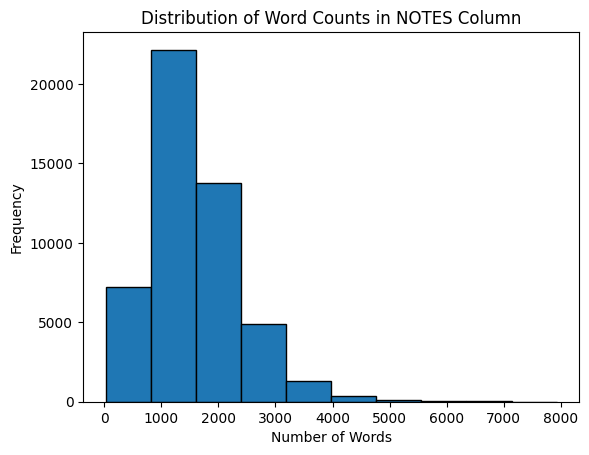

In [194]:
import matplotlib.pyplot as plt

result['Word_Count'] = result['NOTES'].str.split(r'\s+|\n+').apply(len)

plt.hist(result['Word_Count'], bins=10, edgecolor='k')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in NOTES Column')
plt.show()

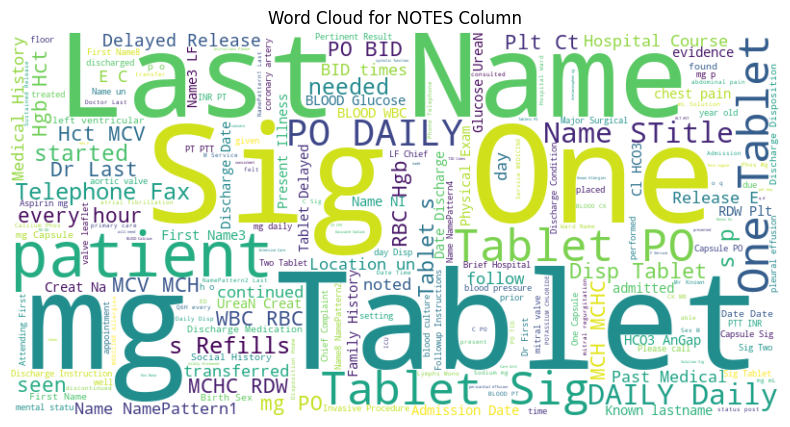

In [212]:
from wordcloud import WordCloud
all_notes = ' '.join(result['NOTES'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_notes)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for NOTES Column")
plt.show()

In [197]:
from transformers import pipeline
summarizer = pipeline("summarization", model="Falconsai/medical_summarization")

In [209]:
def get_summary(input_text):
    summary = summarizer(input_text, max_length=500, min_length=200, do_sample=False)
    return summary[0]['summary_text']

In [210]:
print(get_summary(result['NOTES'].iloc[0]))

tracheobronchoplasty (**5-5**] s/p perc trach [**5-13**]] is a rare complication of respiratory failure due to a COPD exacerbation . this case report describes a 81 year old woman with a history of chronic chest pain . she was admitted to [**Hospital1 18**] for respiratory failure . a repeat bronchoscopy on [**2118-8-1**] revealed granulation tissue at the distal right lateral wall of the stent . the patient was subsequently discharged for physical and pulmonary rehab.results:the patient had a mild symetrical smile and ptosis . in addition to re-intubation , she was referred to the hospital for a period of 82 years . her symptoms were asymptomatic and recurrence was reported in the hospital .


In [211]:
result['NOTES'].iloc[0]

'Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]\n\n\nService: CARDIOTHORACIC\n\nAllergies:\nAmlodipine\n\nAttending:[**Last Name (NamePattern1) 1561**]\nChief Complaint:\n81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]\ns/p perc trach [**5-13**]\n\nMajor Surgical or Invasive Procedure:\nbronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]\ns/p trachealplasty [**5-5**]\npercutaneous tracheostomy [**5-13**] after failed extubation\ndown size trach on [**5-25**] to size 6 cuffless\n\n\nHistory of Present Illness:\nThis 81 year old woman has a history of COPD. Over the past five\n\nyears she has had progressive difficulties with her breathing.\nIn\n[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure\ndue\nto a COPD exacerbation. Due to persistent hypoxemia, she\nrequired\nintubation and a eventual bronchoscopy on [**2118-6-9**] revealed marked\n\nnarrowing of the airways on expiration consistent with\ntr

In [157]:
df_fil1 = df_fil.dropna(subset=['Discharge_Diagnosis'])

In [168]:
df_fil1['NOTES'] = df_fil1.apply(lambda row : row['TEXT'].replace(str(row['Discharge_Diagnosis']), ''), axis=1)

/tmp/ipykernel_156546/2412201344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil1['NOTES'] = df_fil1.apply(lambda row : row['TEXT'].replace(str(row['Discharge_Diagnosis']), ''), axis=1)


In [169]:
df_fil1

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,Discharge_Diagnosis,NOTES
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] Discharge Date: [**2119-5-25**]\n\n\nService: CAR...,"Discharge Diagnosis:\nCOPD, Coronary Artery Disease/atypical angina (LAD 30%, RCA 30%,\nEF 63%),...",Admission Date: [**2119-5-4**] Discharge Date: [**2119-5-25**]\n\n\nService: CAR...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] Discharge Date: [**2124-8-18**]\n\n\nService: ME...,Discharge Diagnosis:\nPrimary:\n1. Chronic Obstructive Pulmonary Disease Exacerbation\n2. Respir...,Admission Date: [**2124-7-21**] Discharge Date: [**2124-8-18**]\n\n\nService: ME...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] Discharge Date: [**2162-3-25**]\n\nDate of Birth:...,Discharge Diagnosis:\n1. Cervical spondylosis with calcification of posterior\nlongitudinal liga...,Admission Date: [**2162-3-3**] Discharge Date: [**2162-3-25**]\n\nDate of Birth:...
5,179,53181,170490.0,2172-03-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2172-3-5**] Discharge Date: [**2172-3-8**]\n\nDate of Birth: ...,Discharge Diagnosis:\nbrain lesion,Admission Date: [**2172-3-5**] Discharge Date: [**2172-3-8**]\n\nDate of Birth: ...
6,180,20646,134727.0,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] Discharge Date: [**2112-12-10**]\n\n\nService: M...,Discharge Diagnosis:\nPneumonia,Admission Date: [**2112-12-8**] Discharge Date: [**2112-12-10**]\n\n\nService: M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60098,59628,92764,186377.0,2131-08-15,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 14336**],[**Known firstname **] Unit No: [**Numeric I...",Discharge Diagnosis:\nCoronary Artery Disease,"Name: [**Known lastname 14336**],[**Known firstname **] Unit No: [**Numeric I..."
60159,59634,92346,156564.0,2164-08-13,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname **],[**Known firstname **] Unit No: [**Numeric Iden...",Discharge Diagnosis:\nLeft knee infection,"Name: [**Known lastname **],[**Known firstname **] Unit No: [**Numeric Iden..."
60203,59614,19405,153222.0,2125-07-08,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18335**], [**Known firstname 63**] Unit No: [**Nume...",DISCHARGE DIAGNOSES:\n1. Gastrointestinal bleed.\n2. Atrial fibrillation.\n3. Anemia secondar...,"Name: [**Known lastname 18335**], [**Known firstname 63**] Unit No: [**Nume..."
60314,59606,28475,172559.0,2115-02-26,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18284**],[**Known firstname 394**] Unit No: [**Numeri...",Discharge Diagnosis:\nPrimary:\nSmall bowel obstruction\nMetastatic prostate cancer\nAnasarca\nM...,"Name: [**Known lastname 18284**],[**Known firstname 394**] Unit No: [**Numeri..."


In [96]:
print(df_fil['TEXT'].iloc[3])

Admission Date:  [**2172-3-5**]              Discharge Date:   [**2172-3-8**]

Date of Birth:  [**2109-10-8**]             Sex:   F

Service: NEUROSURGERY

Allergies:
No Known Allergies / Adverse Drug Reactions

Attending:[**First Name3 (LF) 1835**]
Chief Complaint:
Meningioma

Major Surgical or Invasive Procedure:
Right Craniotomy


History of Present Illness:
[**Known firstname 622**] [**Known lastname 1836**] is a 62-year-old woman, with longstanding
history of rheumatoid arthritis, probable Sweet's syndrome, and
multiple joint complications requiring orthopedic interventions.
She was found to hve a right cavernous sinus and nasopharyngeal
mass.  She underwent a biopsy of hte nasopharyngeal mass by Dr.
[**First Name4 (NamePattern1) **] [**Last Name (NamePattern1) 1837**] and the pathology, including flow
cytometry,
was reactive for T-cell lymphoid hyperplasia only.

She has a longstanding history of rheumatoid arthritis that
involved small and large joints in her body.  Her disease 

In [15]:
for item in df_notes["CATEGORY"].unique():
    print(item, df_notes[df_notes["CATEGORY"]==item]["DESCRIPTION"].unique()[:10])
    print(".....")

Discharge summary ['Report' 'Addendum']
.....
Echo ['Report']
.....
ECG ['Report']
.....
Nursing ['Nursing Transfer Note' 'Nursing Progress Note' 'Nursing discharge note'
 'Generic Note' 'Addendum to transfer Note' 'progress note' 'set as error'
 'Nursing 1900-0700' 'Nursing Note' 'ICU Event Note']
.....
Physician  ['Physician Resident Progress Note' 'Physician Resident Admission Note'
 'Physician Attending Admission Note' 'Physician Attending Progress Note'
 'Arterial Line' 'Intensivist Note' 'Attending Progress Note'
 'Resident Progress Note' 'Transfer Planning' 'Family Meeting Note']
.....
Rehab Services ['Physical Therapy Evaluation Note' 'PT/Rehab Services' 'PT/Rehab'
 'Physical Therapy Progress Note' 'Generic Note' 'Rehab/PT' 'Contact note'
 'Physical Therapy Re-evaluation Note' 'Physical Therapy Contact Note'
 'PT Contact Note']
.....
Case Management  ['Case Management Continued Stay Review'
 'Case Managment Initial Patient Assessment'
 'Case Management Dicharge Plan' 'Nursing 1

In [12]:
df_notes["CATEGORY"].unique()

array(['Discharge summary', 'Echo', 'ECG'], dtype=object)

In [57]:
df_notes[df_notes["SUBJECT_ID"]==13702]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
60248,59797,13702,196489.0,2124-07-24,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Chronic...
101350,106349,13702,196489.0,2124-07-24,NaN,NaN,ECG,Report,NaN,NaN,The rhythm may be sinus tachycardia with an at...
...,...,...,...,...,...,...,...,...,...,...,...
1460545,1441194,13702,167118.0,2119-05-20,2119-05-20 05:07:00,2119-05-20 05:39:00,Nursing/other,Report,17474.0,NaN,D Neuro: pt alert responding appropriately to ...
1462866,1441196,13702,167118.0,2119-05-20,2119-05-20 15:23:00,2119-05-20 15:43:00,Nursing/other,Report,19689.0,NaN,Nursing Progress Note.\n\nRESP: Pt received on...
1463102,1441142,13702,167118.0,2119-05-07,2119-05-07 04:57:00,2119-05-07 05:25:00,Nursing/other,Report,15767.0,NaN,"NPN:\n\nNeuro: Alert and oriented to place, an..."
1463103,1441143,13702,167118.0,2119-05-07,2119-05-07 06:41:00,2119-05-07 06:46:00,Nursing/other,Report,14236.0,NaN,RESPIRATORY CARE:\n\nFollowing for bronchodila...


In [55]:
print(df_notes[df_notes["SUBJECT_ID"]==13702].iloc[0]["TEXT"])

Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]

Date of Birth:                    Sex:  F

Service:  MICU and then to [**Doctor Last Name **] Medicine

HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female
with a history of emphysema (not on home O2), who presents
with three days of shortness of breath thought by her primary
care doctor to be a COPD flare.  Two days prior to admission,
she was started on a prednisone taper and one day prior to
admission she required oxygen at home in order to maintain
oxygen saturation greater than 90%.  She has also been on
levofloxacin and nebulizers, and was not getting better, and
presented to the [**Hospital1 18**] Emergency Room.

In the [**Hospital3 **] Emergency Room, her oxygen saturation was
100% on CPAP.  She was not able to be weaned off of this
despite nebulizer treatment and Solu-Medrol 125 mg IV x2.

Review of systems is negative for the following:  Fevers,
chills, nausea, vomiting, night sweats, change in we

In [38]:
print(df_notes[df_notes["CATEGORY"]=="ECG"].iloc[0]["TEXT"])

Sinus tachycardia
Short PR interval
Possible anterior infarct - age undetermined
Left atrial abnormality
Inferior T wave changes are borderline
Repolarization changes may be partly due to rate
Low QRS voltages in limb leads
Since previous tracing of [**2103-7-27**], no significant change




In [39]:
df_notes["CATEGORY"].unique()

array(['Discharge summary', 'Echo', 'ECG'], dtype=object)

In [10]:
df_items = pd.read_csv("D_ITEMS.csv")

In [16]:
df_items[df_items["ITEMID"]==223835]

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
12413,12804,223835,Inspired O2 Fraction,FiO2,metavision,chartevents,Respiratory,None,Numeric,NaN


In [21]:
df_diag = pd.read_csv("DIAGNOSES_ICD.csv")

In [22]:
df_diag

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275
